In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from rating_trend import *

In [2]:
df_recipe = pd.read_csv("data/RAW_recipes.csv")
df_interactions = pd.read_csv("data/RAW_interactions.csv")


In [3]:
years = set([int(x[:4]) for x in df_interactions["date"]])
year_from, year_to = get_range(years)
year_range = [x for x in range(year_from, year_to)]


Text(0.5, 1.0, '# reivews vs Year')

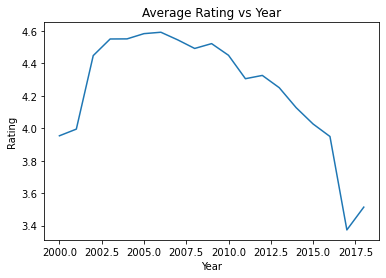

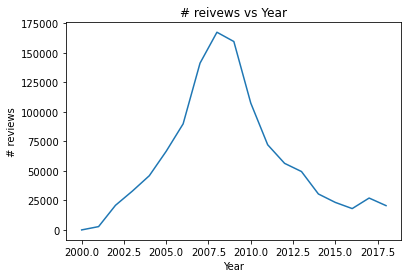

In [4]:
avg_ratings, count_reviews = get_summary(df_recipe, df_interactions, year_from, year_to)

plt.plot(year_range, avg_ratings)
plt.xlabel("Year")
plt.ylabel("Rating")
plt.title("Average Rating vs Year")
plt.figure()
plt.plot(year_range, count_reviews)
plt.xlabel("Year")
plt.ylabel("# reviews")
plt.title("# reivews vs Year")


In [5]:
reviews = aggregate_reviews(df_recipe, df_interactions)

In [6]:
slope_rids, slopes = get_review_slope(reviews)
slope_zip = list(zip(slope_rids, slopes))

In [7]:
rid2dfid = get_dict(df_recipe["id"], list(range(len(df_recipe))))

254206 hummingbird food -0.5620707070707068
281300 skillet creamy lemon chicken -0.43939393939393917
69051 homemade bisquick mix -0.43181818181818193
107997 4 minute spicy garlic shrimp -0.4163855752091046
2791 outback steakhouse walkabout onion soup -0.41363111635838895


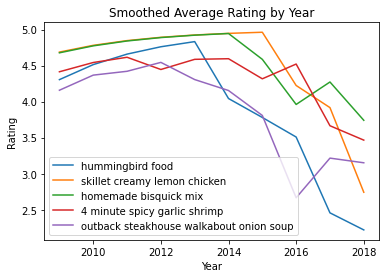

In [8]:
names = []

x = year_range[-10:]
for rid, slope in slope_zip[:5]:
    name = df_recipe["name"][rid2dfid[rid]]
    names.append(name)
    print(rid, name, slope)
    
    data = reviews[rid][3][-10:]
    y = smooth(data)
    plt.plot(x, y)

plt.xlabel("Year")
plt.ylabel("Rating")
plt.title("Smoothed Average Rating by Year")
plt.legend(names)

254495 gordon ramsay s malaysian chicken curry 0.23515151515151497
395619 poor man s lobster  butter baked cod 0.23636363636363647
74080 homemade corn syrup substitute   simple syrup 0.23787878787878777
181230 rigatoni  d   maggiano s 0.24191919191919192
19061 wendy s chili recipe 0.3042424242424243


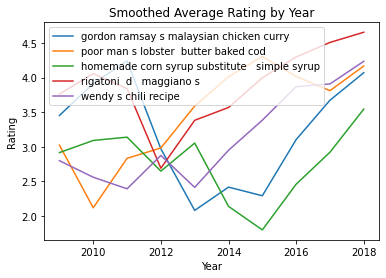

In [9]:
names = []

x = year_range[-10:]
for rid, slope in slope_zip[-5:]:
    name = df_recipe["name"][rid2dfid[rid]]
    names.append(name)
    print(rid, name, slope)
    
    data = reviews[rid][3][-10:]
    y = smooth(data)
    plt.plot(x, y)

plt.xlabel("Year")
plt.ylabel("Rating")
plt.title("Smoothed Average Rating by Year")
plt.legend(names)

In [10]:
df_r = df_recipe.loc[df_recipe["id"].isin(slope_rids)]


In [11]:
slopedict = get_dict(slope_rids, slopes)
df_r["review_slope"] = [slopedict[x] for x in df_r["id"]]


/tmp/ipykernel_4095/1795303918.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_r["review_slope"] = [slopedict[x] for x in df_r["id"]]


In [12]:
# nutrition = calorie, fat, sugar, sodium, protein, sat fat, carb        
nutnames = ["calorie", "fat", "sugar", "sodium", "protein", "sat fat", "carbs"]
nuts = parse_list_str(df_r["nutrition"])
for i in range(7):
    df_r[nutnames[i]] = nuts[i]


/tmp/ipykernel_4095/1718647480.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_r[nutnames[i]] = nuts[i]


In [13]:
cols = ["minutes", "n_steps", "n_ingredients", "calorie", "fat", "sugar", "sodium", "protein", "sat fat", "carbs", "review_slope"]
df_rc = df_r[cols]

In [14]:
df_rc.corr()

,minutes,n_steps,n_ingredients,calorie,fat,sugar,sodium,protein,sat fat,carbs,review_slope
minutes,1.000000,0.128926,0.048234,0.166200,0.169314,-0.032574,0.167291,0.288203,0.154750,-0.025510,-0.054668
n_steps,0.128926,1.000000,0.270582,0.148780,0.094578,0.071708,0.077507,0.112522,0.120666,0.137138,-0.016580
n_ingredients,0.048234,0.270582,1.000000,0.037728,0.064893,-0.039203,0.060335,0.034272,0.073698,-0.021254,0.089937
calorie,0.166200,0.148780,0.037728,1.000000,0.884272,0.347733,0.612480,0.766474,0.799862,0.589938,0.000656
fat,0.169314,0.094578,0.064893,0.884272,1.000000,0.094221,0.531375,0.741881,0.889262,0.186287,0.006212
sugar,-0.032574,0.071708,-0.039203,0.347733,0.094221,1.000000,0.212422,0.005176,0.096869,0.666131,-0.055884
sodium,0.167291,0.077507,0.060335,0.612480,0.531375,0.212422,1.000000,0.638662,0.483591,0.284934,-0.009762
protein,0.288203,0.112522,0.034272,0.766474,0.741881,0.005176,0.638662,1.000000,0.706293,0.125497,0.000980
sat fat,0.154750,0.120666,0.073698,0.799862,0.889262,0.096869,0.483591,0.706293,1.000000,0.168057,0.023081
carbs,-0.025510,0.137138,-0.021254,0.589938,0.186287,0.666131,0.284934,0.125497,0.168057,1.000000,-0.005382


<AxesSubplot:>

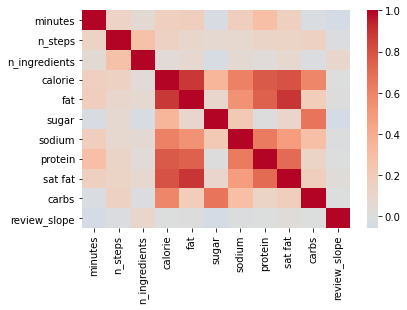

In [15]:
sns.heatmap(df_rc.corr(), cmap="coolwarm", center=0)

<AxesSubplot:>

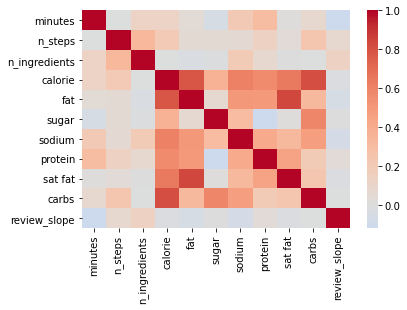

In [16]:
sns.heatmap(df_rc[df_rc["review_slope"] > 0].corr(), cmap="coolwarm", center=0)

<AxesSubplot:>

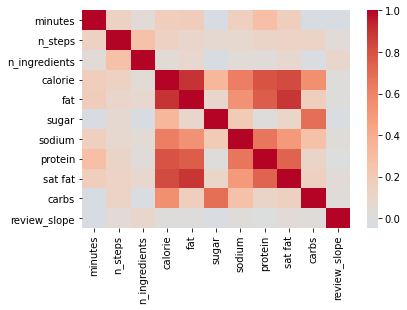

In [17]:
 sns.heatmap(df_rc[df_rc["review_slope"] < 0].corr(), cmap="coolwarm", center=0)

Text(0.5, 1.0, 'Smoothed Average Rating by Year')

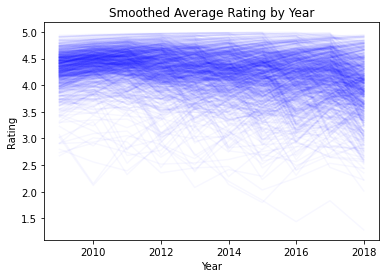

In [23]:
names = []

x = year_range[-10:]
for rid, slope in slope_zip:
    name = df_recipe["name"][rid2dfid[rid]]
    #names.append(name)
    #print(rid, name, slope)
    
    data = reviews[rid][3][-10:]
    y = smooth(data)
    plt.plot(x, y, 'b', alpha=0.03)

plt.xlabel("Year")
plt.ylabel("Rating")
plt.title("Smoothed Average Rating by Year")
#plt.legend(names)